# Homework 12: sampling with random walks/MCMC in low and high dimension, Brownian motion and diffusion

In this exercise, you will apply some of the concepts seen in lecture 11 and 12. In exercise 1, you will estimate $\pi$ with Markov chains. Exercise 2 is optional and is a simple illustration of the curse of dimensionality. In exercise 3, you will use MCMC to sample a high-dimensional distribution and discuss the detailed balance condition. In exercise 4, you will numerically approximate the solution to the diffusion equation from random walks and compare it to the analytical solution.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Exercise 1: Estimating $\pi$ by sampling the square with Markov chains.

In exercise 8 you estimated $\pi$ by sampling points uniformly on the square and counting the number of points that fell in a circle. In this exercise, we will solve the same problem using Markov chains.

**1.1** We want to sample points uniformly on a square to estimate $\pi$ by using the ratio of points inside and outside the unit circle. We will first try to solve this problem the **wrong way**, but perhaps more intuitive way. We use a Markov chain to sample the points. The chain $(\mathbf{x}(t=0), \mathbf{x}(t=1), ..., \mathbf{x}(t=T))$ has the following behavior:
1. Initialize the position of the walker in $\mathbf{x}(t=0)=(1,1)$.
2. Draw a step $\mathbf{\Delta} =(\Delta_x , \Delta_y )$ from a given distribution.
   - If the step brings the walker outside of the square, resample $\mathbf{\Delta} =(\Delta_x , \Delta_y )$ and repeat from step 2.
   - Otherwise, the walker moves and the new position is $\mathbf{x}(t+1)=\mathbf{x}(t)+\mathbf{\Delta}$
3. Sample the point $\mathbf{x}(t+1)$ **(i.e. we sample only when the walker moved)**.
4. Repeat from step 2 until $T$ is reached.

Implement this algorithm with $\Delta_x$ and $\Delta_y$ sampled uniformly between $-0.1$ and $0.1$. The algorithm should output the chain as a $(T+1)\times 2$ array and the total number of points $N_{in}$ inside the unit circle until $t$ as an array of size $T$.


In [2]:
# Your solution here:

In [3]:
rng = np.random.default_rng()

def markov_pi_wrong(T=100000, delta=0.1):
    N_hits=0
    N_hits_array=np.zeros(T)
    pos=np.zeros((T+1,2))
    x=1
    y=1
    pos[0,0]=x
    pos[0,1]=y
    for t in range(T):
        moved=False
        while not moved:
            Dx=rng.uniform(-delta, delta)
            Dy=rng.uniform(-delta, delta)
            if np.abs(x+Dx)<1 and np.abs(y+Dy)<1:
                moved=True
                x+=Dx
                y+=Dy
                if x**2+y**2<1:
                    N_hits+=1
            pos[t+1,:]=np.array([x,y])
        N_hits_array[t]=N_hits

    return pos, N_hits_array

**1.2** Simulate $3$ chains with $T=10^5$ and plot your estimation of $\pi$ after each step for each of the $3$ chains. The estimation of $\pi$ after $t$ steps is given by
\begin{equation}
    \pi (t) \approx \frac{4 N_{in}}{t}.
\end{equation}
Also draw a line where the real value of $\pi$ is. Do you find the correct value of $\pi$ ?

In [4]:
# Your solution here:

In [5]:
# Solution
T=100000
_, N_hits_array=markov_pi_wrong(T=T)
_, N_hits_array2=markov_pi_wrong(T=T)
_, N_hits_array3=markov_pi_wrong(T=T)

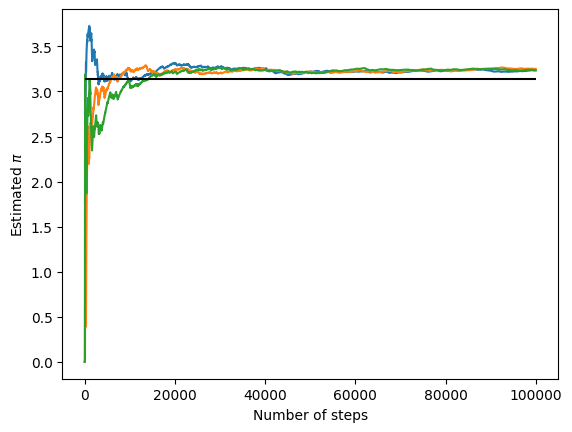

In [6]:
plt.plot(np.arange(1,T+1),N_hits_array*4/np.arange(1,T+1))
plt.plot(np.arange(1,T+1),N_hits_array2*4/np.arange(1,T+1))
plt.plot(np.arange(1,T+1),N_hits_array3*4/np.arange(1,T+1))
plt.xlabel('Number of steps')
plt.ylabel('Estimated $\pi$')
plt.hlines(np.pi,0, T, color='k');

We don't seem to find the correct value of $\pi$.

**1.3** We will now do it the **correct way**. Through the detailed balance condition, we can design the random evolution $\mathbf x(t) \to \mathbf x(t+1)$ such that the stationary distribution of $\mathbf x(t)$ is the distribution we want.
The detailed balance condition reads
$$
    P(a \to b) \pi(a) = P(b \to a) \pi(b) \quad \forall \,a,b
$$
where $P(a \to b)$ is the transition probability of going from $a \to b$, $\pi$ is the distribution we want to sample from (the stationary distribution of our MCMC), and $a,b$ are possible states of our random walker.

Write the detailed balance condition for $a = \mathbf x$, $b = \mathbf x + \Delta$, supposing that both $a, b$ are in the square. In other words, we are considering the case in which we propose a step for our random walker, and the step keeps it in the square. What does it imply for $P(a\to b)$? Answer in 2 lines.

**Answer** 
$$
    P(\mathbf x \to \mathbf x + \Delta) \pi(\mathbf x) = P(\mathbf x + \Delta \to \mathbf x) \pi(\mathbf x+\Delta) 
    \implies
    P(\mathbf x \to \mathbf x + \Delta) = P(\mathbf x + \Delta \to \mathbf x) \quad \forall \,\mathbf x, \mathbf x+\Delta \text{ in the unit square}
$$
The transition probability between two points inside the square must be symmetric.

**1.4** Write the detailed balance condition for $a = \mathbf x$, $b = \mathbf x + \Delta$, supposing that $a$ is in the square, but $b$ is *not* in the square. In other words, we are proposing a step for our random walker that would bring it out of the square. What does it imply for the transition probability?

**Answer**
$$
    P(\mathbf x \to \mathbf x + \Delta) \pi(\mathbf x) = P(\mathbf x + \Delta \to \mathbf x) \pi(\mathbf x+\Delta) \implies
    P(\mathbf x \to \mathbf x + \Delta) = 0 \quad \forall\,\mathbf x\, \text{in the unit square, } \forall\,\mathbf x+\Delta \text{ not in the square}
$$
The transition probability to move from inside to outside the square is zero, so the random walker can never exit the square.

 But should one draw another move or stay in place in this case ? One should stay in place ! Indeed, if one does not, we have that the walkers spend less time at the borders than in the center, which means that one would not sample the square uniformly ! This is explain in more details in the case of the disk in section 12.2 of the lecture notes.

**1.5** From 1.3 and 1.4 we obtain the following algorithm. It is the same as before except for the fact that we sample the point whether the walker moved or not:
1. Initialize the position of the walker in $\mathbf{x}(t=0)=(1,1)$.
2. Draw a step $\mathbf{\Delta} =(\Delta_x , \Delta_y )$ from a given distribution.
   - If the step brings the walker outside of the square, the walker doesn't move: $\mathbf{x}(t+1)=\mathbf{x}(t)$.
   - Otherwise, the walker moves and the new position is $\mathbf{x}(t+1)=\mathbf{x}(t)+\mathbf{\Delta}$
3. Sample the point $\mathbf{x}(t+1)$ **whether the walker moved or not**.
4. Repeat from step 2 until $T$ is reached.
   
Implement this algorithm with $\Delta_x$ and $\Delta_y$ sampled uniformly between $-0.1$ and $0.1$. The algorithm should output the chain as a $(T+1)\times 2$ array and the total number of points inside the circle until $t$ as an array of size $T$. Additionally, your function should also output an array of length $T$ containing $1$ or $0$ if the walker is inside or outside the circle at time $t$ (this will be useful for the rest of the exercise).


In [7]:
# Your solution here

In [8]:
# Solution
def markov_pi(T=100000, delta_x=0.1, delta_y=0.1, pos_init=np.array([1.,1])):
    N_hits=0
    N_hits_array=np.zeros(T)
    hit_array=np.zeros(T)
    pos=np.zeros((T+1,2))
    pos[0]=pos_init
    x=pos_init[0]
    y=pos_init[1]
    for t in range(T):
        Dx=rng.uniform(-delta_x, delta_x)
        Dy=rng.uniform(-delta_y, delta_y)
        if np.abs(x+Dx)<1 and np.abs(y+Dy)<1:
            x+=Dx
            y+=Dy
        if x**2+y**2<1:
            N_hits+=1
            hit_array[t]=1
        pos[t+1,:]=np.array([x,y])
        N_hits_array[t]=N_hits

    return pos, N_hits_array, hit_array

**1.6** Apply your algorithm for $T=300$ steps and plot the obtained chain. Set the aspect ratio to 'equal' to have a better visualization, and optionally also plot the unit circle.

In [9]:
# Your solution here:

In [10]:
# Solution
pos, _, _=markov_pi(T=300, delta_x=0.1, delta_y=0.1)

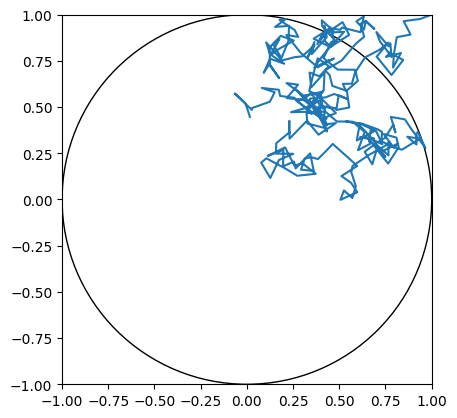

In [11]:
plt.plot(pos[:,0], pos[:,1])
plt.gca().add_patch(plt.Circle((0,0),1, color='k', fill=False))
ax=plt.gca()
ax.set_aspect('equal')
plt.xlim(-1,1)
plt.ylim(-1,1);

**1.7** Repeat 1.2 with the new algorithm. This time it should converge to $\pi$.

In [12]:
# Your solution here:

In [13]:
# Solution
T=100000
pos, N_hits_array,_=markov_pi(T=T)
pos, N_hits_array2,_=markov_pi(T=T)
pos, N_hits_array3,_=markov_pi(T=T)

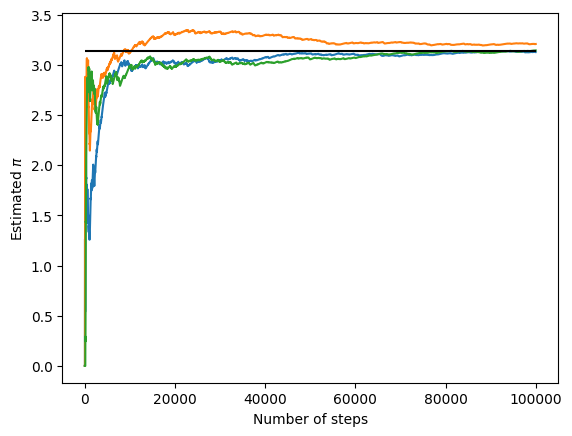

In [14]:
plt.plot(np.arange(1,T+1),N_hits_array*4/np.arange(1,T+1))
plt.plot(np.arange(1,T+1),N_hits_array2*4/np.arange(1,T+1))
plt.plot(np.arange(1,T+1),N_hits_array3*4/np.arange(1,T+1))
plt.xlabel('Number of steps')
plt.ylabel('Estimated $\pi$')
plt.hlines(np.pi,0, T, color='k');

**1.8** Do the same but this time sample $\Delta_y$ from a uniform distribution between $-1$ and $1$ (while keeping $\Delta_x$ uniform between $-0.1$ and $0.1$). Do you still converge to $\pi$ ?

In [15]:
# Your solution here:

In [16]:
# Solution:
T=100000
pos, N_hits_array,_=markov_pi(T=T, delta_y=1)
pos, N_hits_array2,_=markov_pi(T=T, delta_y=1)
pos, N_hits_array3,_=markov_pi(T=T, delta_y=1)

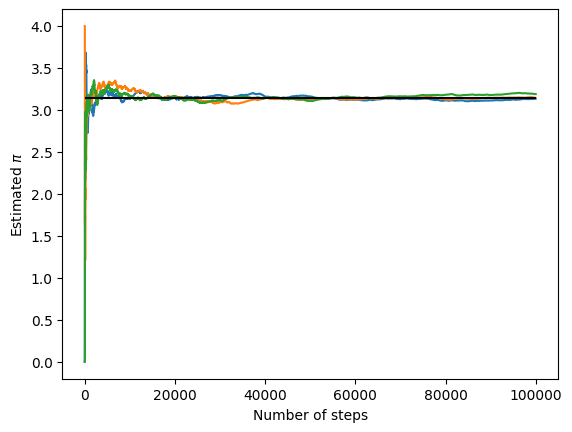

In [17]:
plt.plot(np.arange(1,T+1),N_hits_array*4/np.arange(1,T+1))
plt.plot(np.arange(1,T+1),N_hits_array2*4/np.arange(1,T+1))
plt.plot(np.arange(1,T+1),N_hits_array3*4/np.arange(1,T+1))
plt.xlabel('Number of steps')
plt.ylabel('Estimated $\pi$')
plt.hlines(np.pi,0, T, color='k');

We still converge to $\pi$.

**1.9** We now discuss how to estimate the error on the value of $\pi$. Consider again that $\Delta_x$ and $\Delta_y$ are sampled uniformly between $-0.1$ and $0.1$. Run a markov chain of length $T=10^5$ steps. Suppose that each point of the random walk is sampled i.i.d uniformly on the square. Give the obtained value of $\pi$ and its error. Recall that you can estimate the error using $\frac{1}{\sqrt{T}} s$ where $s^2$ is the unbiased empirical estimator of the  variance (see ex. 1.1 of homework 9 if you have doubts on how to compute the error). Alternatively you can also use the obtained variance from section 8.2 of the lecture notes. Is the true value of $\pi$ inside the error estimate ? Is the obtained error reasonable to you ?

In [18]:
# Your solution here:

In [19]:
# Solution:
T=100000
_, N_hits_array,hit_array=markov_pi(T=T, delta_x=0.1, delta_y=0.1)
pi=N_hits_array[-1]*4/T
error=4*np.std(hit_array,ddof=1)/np.sqrt(T)
print(f'pi = {pi:.4f} +- {error:.4f}')
if pi-error<np.pi<pi+error:
    print('True value of pi is within the error bars.')
else:
    print('True value of pi is not within the error bars.')

pi = 3.1336 +- 0.0052
True value of pi is not within the error bars.


**1.10** We can obtain a better estimation of the error on $\pi$ by running multiple Markov chains and computing an estimation of $\pi$ for each of them. If the chains are long enough, then the obtained values for the different chains are i.i.d. Compute the mean value of $\pi$ after $T=10^4$ steps for $k=10$ runs and its error. We now compute the error as $\frac{1}{\sqrt{k}} s$ where $s^2$ is the unbiased empirical estimator of the  variance of our $k$ values of $\pi$.

In [20]:
# Your solution here:

In [21]:
# Solution:
pis=[]
k=10
T=10000
for _ in range(k):
    _, N_hits_array,_=markov_pi(T=T, delta_x=0.1, delta_y=0.1)
    pis.append(N_hits_array[-1]*4/T)
mean_pi=np.mean(pis)
error=np.std(pis,ddof=1)/np.sqrt(k)
print(f'pi = {mean_pi:.4f} +- {error:.4f}')
if mean_pi-error<np.pi<mean_pi+error:
    print('True value of pi is within the error bars.')
else:
    print('True value of pi is not within the error bars.')

pi = 3.1142 +- 0.0399
True value of pi is within the error bars.


# Exercise 2 (optional): Curse of dimensionality

In this exercise, we present the curse of dimensionality with a simple example.

**2.1** Consider a hypercube with side of length $0.9$ and a hypercube with side of length $1$. What is the ratio of the volume of the small hypercube compared to the large hypercube for $d=1,2,5,10, 25, 50$ ?

In [22]:
# Your solution here:

In [23]:
# Solution
def ratio(d):
    return 0.9**d
d=np.array([1,2,5,10, 25, 50])
print(np.round(ratio(d),3))

[0.9   0.81  0.59  0.349 0.072 0.005]


## Exercise 3: sampling with MCMC in high dimension (adapted from the mock graded exercise of 2024)

In high dimensions, the curse of dimensionality may hinder the effectiveness of sampling algorithms that work just fine in low dimension. In the previous exercise, we also see that "high dimension" can be not so "high". For instance, $>90\%$ of uniformly drawn points in the hypercube of length $1$ will not be in the hypercube of length $0.9$ for $d=25$.

Let us recall some definitions first. The $d$-dimensional unit cube $H_d$ is the set $H_d = [-1, 1]^d \subset \mathbb{R}^d$, i.e. the centered  cube with side of length 2. 
The $d$-dimensional disk $D_d$ is the set $D_d = \{ x \in \mathbb{R}^d \text{ such that } ||x|| \leq 1\} \subset \mathbb{R}^d$. 
The $d$-dimensional Euclidean norm is defined as 
$$
    ||x||^2 = \sum_{i=1}^d x_i^2 \, .
$$

In this exercise, we will implement Markov Chain Monte Carlo (MCMC) methods that allow to sample some high dimensional distribution.
We will sample i.i.d. points uniformly distributed in the disk using MCMC: we perform a carefully engineered random walk for $T$ time steps in the disk, such that all samples are directly i.i.d. in the disk.

We will then use the i.i.d. sample that we obtain to compute the average length of a vector uniformly distributed on the disk, i.e. to compute
$$
    \mathbb{E}_{x \sim D_d} [||x||] = \frac{
        \int_{||x|| \leq 1} d^dx \, ||x||
    }{
        \int_{||x|| \leq 1} d^dx 
    }
$$
where the notation $\mathbb{E}_{x \sim D_d} f(x)$ is a shorthand for "average of the function $f(x)$ for $x$ uniformly distributed over the set $D_d$". 


In class, and in exercise 1, we learned that it is possible to use Markov Chain Monte Carlo (MCMC) to sample from a generic distribution. 
MCMC is first of all a random walk, i.e. a sequence of points $x(t) \in \mathbb{R}^d$ that are generated one after the other with some kind of randomness. 
It is also a Markov Chain, which means that the evolution $x(t) \to x(t+1)$ is random, and that $x(t+1)$ depends only on $x(t)$, and not on all previous positions of the chain.

Let us design an MCMC algorithm to sample from $\pi = $ uniform distribution on the disk, i.e.
$$
    \pi(x) = \begin{cases}
        \frac{1}{\Omega_d} & \text{if } x \in D_d \\
        0 & \text{otherwise}
    \end{cases}
$$
where $\Omega_d$ is the volume of the $d$-dimensional disk $D_d$ (and acts as a normalisation of our p.d.f. $\pi$).
We consider a simple random walker, defined by $x(t=0) = 0 \in \mathbb{R}^d$, and $x(t+1) = x(t) + \Delta$.
$\Delta$ is our evolution step, and is a random variable, independent and identically distributed with p.d.f. $\rho(\Delta)$ at each different time step.
The only freedom we have left in the design of the random walk is the distribution $\rho(\Delta)$, so we need to use the detailed balance condition to fix $\rho$ in order to sample from $\pi$.

We saw in exercise 1 that the detailed balance condition gives us the following MCMC algorithm, which is guaranteed to sample the uniform distribution on the disk $D_d$ (after possibly some time steps of equilibration).
- Initialize $x(t=0) = 0$
- Generate randomly an increment $\Delta \in \mathbb{R}^d$ using a symmetric p.d.f. $\rho$ (see exercise 1).
- If $x(t) + \Delta \in D_d$, then set $x(t+1) = x(t)+\Delta$
- If $x(t) + \Delta \notin D_d$, then set $x(t+1) = x(t)$ (see exercise 1)
- Repeat up to a total time $T$.

**Comment:** notice that one could also use a non-symmetric $\rho$, but a symmetric $\rho$ is a simple way of implementing the symmetry of the transition probability.

In what follows, we set $\rho$ to be the uniform distribution in the interval $[-c, c]^d$.

**3.1** Write a function that implements the MCMC algorithm. It takes as input $d, T, c$ and returns an array of the positions $x(t)$ in the same format as the output of `direct_sampling`. Print the output of the function for $d=2$, $T=5$ and $c=1$.

In [24]:
def mcmc(d, T, c):
    init = np.zeros(d)
    points = [init]
    for t in range(1,T):
        Delta = c * np.random.uniform(low=-1, high=1, size=d)
        candidate = points[-1] + Delta
        if np.linalg.norm(candidate) <= 1:
            points = np.vstack((points, candidate))
        else:
            points = np.vstack((points, points[-1]))

    return points

print(mcmc(2, 5, 0.5))

[[ 0.          0.        ]
 [-0.31586952  0.15038163]
 [-0.47782468 -0.16484134]
 [-0.43520866 -0.13702968]
 [ 0.00713961  0.21852201]]


**3.2** Write a function that computes the empirical average of the norm $||x||$ on the output of the function `mcmc`. Print its output on a dataset produced with `mcmc` and $d=2$, $T=5000$, $c=0.2$. Print also the corresponding theoretical value, which is $d/(d+1)$.

In [25]:
def mcmc_empirical_avg(points):
    return np.mean(np.linalg.norm(points, axis=1))

print(mcmc_empirical_avg(mcmc(2,5000,0.2)))
def theoretical_avg(d):
    return d / (d + 1)
print(theoretical_avg(2))

0.6465911472505187
0.6666666666666666


**3.3** 
Generate a dataset using `mcmc` with $d=2$, $T=10000$ and $c=0.5$.
For `k in np.arange(start=10, stop=10000, step=100)`, compute the empirical estimator for the norm using the first `k` points of the dataset.
Plot the value of the empirical estimator as a function of `k`.
Add an horizontal line with the theoretical value.

Text(0, 0.5, 'Empirical estimate of the average norm')

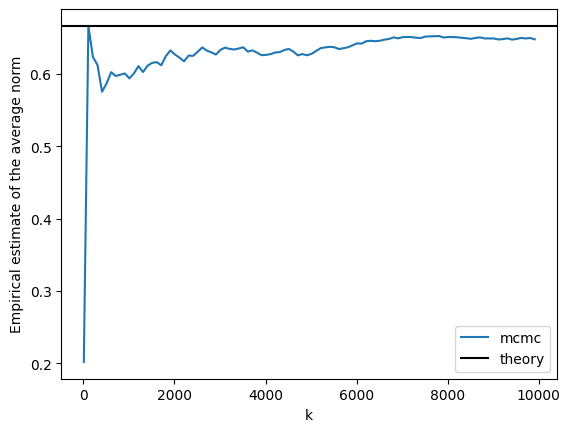

In [26]:
d = 2
T = 10000
c = 0.2

points = mcmc(d, T, c)

ks = np.arange(start=10, stop=10000, step=100)
emp_avg = [ mcmc_empirical_avg(points[0:k]) for k in ks]

plt.plot(ks, emp_avg, label = "mcmc")
plt.axhline(y = theoretical_avg(d), color="black", label = "theory")

plt.legend()
plt.xlabel("k")
plt.ylabel("Empirical estimate of the average norm")

**3.4** Answer the following questions in one line per question.
1. Compute the expected square distance $||x(t+1)-x(t)||^2$, i.e. the square of how far the walker moves at each step.
2. How should we set $c$ in order to have expected square distance $||x(t+1)-x(t)||^2 = 1/2$? 


**Answer**
1. $\mathbb{E}||x(t+1)-x(t)||^2 = \mathbb{E}||\Delta||^2 = \mathbb{E}\sum_{i=1}^d \Delta_i^2 = d c^2 / 3$.
2. We want $\mathbb{E}||x(t+1)-x(t)||^2 = 1/2$, so we need to have $c = \sqrt{3/(2d)}$.

**Comment** We see that in order to have displacements that are of constant size, i.e. of length that is not growing with $d$, we need to rescale $c$ with a precise function of the dimension $d$ (the constant factor is unimportant, as it does not depend on the dimension). If we do not do that, we risk taking too large steps when the dimension increases. The concept of _scaling_ is ubiquitous when considering systems whose dimensionality can change.

**3.5** 
Reproduce exactly the plot in 3.5 for `d = [3,5,10,15,20,100]`. Plot each value of d on a different plot. Use $T = 10000$ and $c = 0.5 / \sqrt{d}$ (in order to have steps of length that is not scaling with $d$, see 3.6).

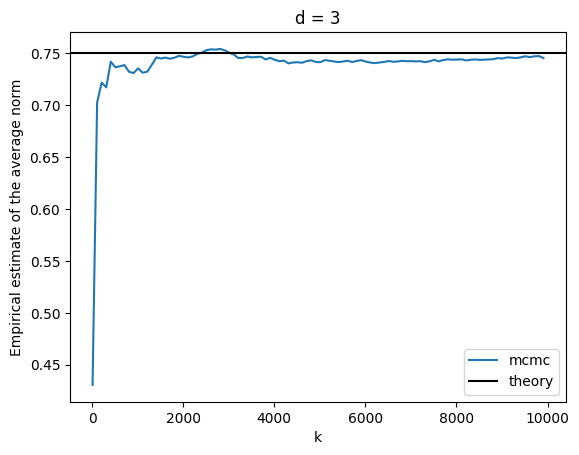

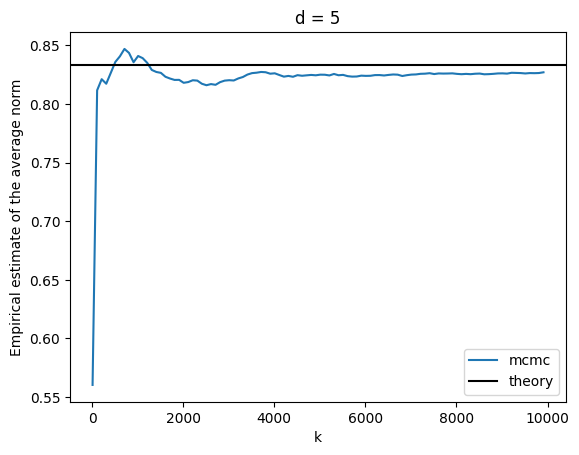

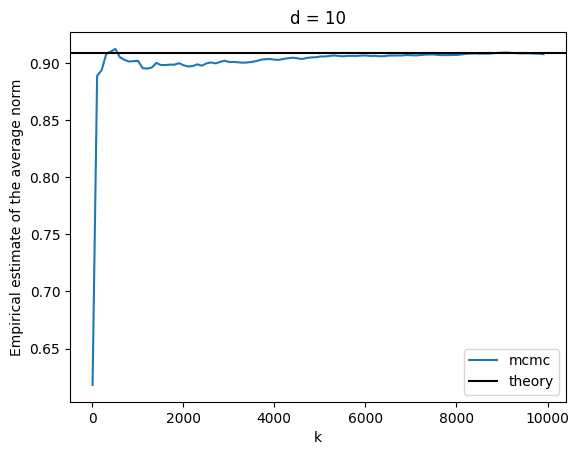

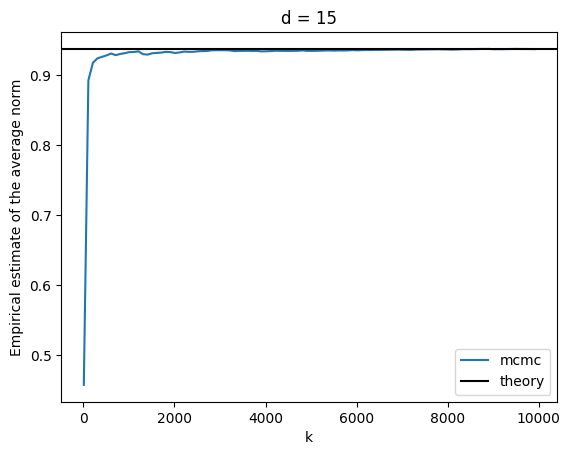

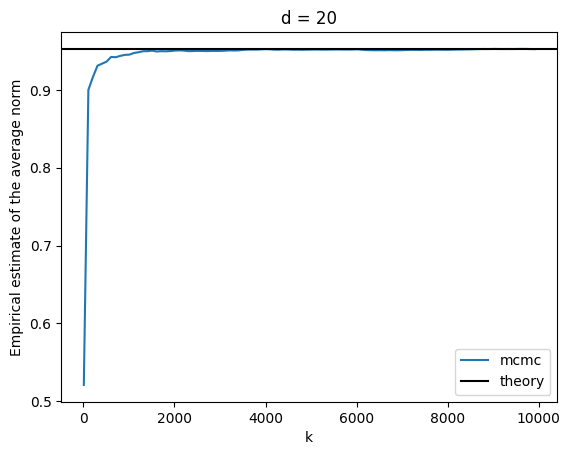

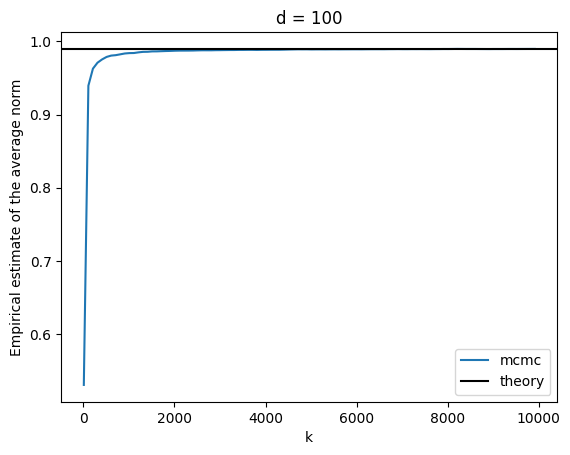

In [27]:
for d in [3,5,10,15,20,100]:
    T = 10000
    c = 0.5 / np.sqrt(d)

    points = mcmc(d, T, c)

    ks = np.arange(start=10, stop=10000, step=100)
    emp_avg = [ mcmc_empirical_avg(points[0:k]) for k in ks]

    plt.plot(ks, emp_avg, label = "mcmc")
    plt.axhline(y = theoretical_avg(d), color="black", label = "theory")

    plt.title(f"d = {d}")
    plt.legend()
    plt.xlabel("k")
    plt.ylabel("Empirical estimate of the average norm")

    plt.show()

**3.6** Does the performance of MCMC degrade as the dimension $d$ increases ? Why ? 

**Answer**
No, because with MCMC all points we sample are inside the disk by construction. Actually, as $d$ increases the convergence speed of MCMC seems to improve.
This is due to the fact that the distribution of the length of a random uniform vector in the disk becomes more and more peaked around its mean as $d$ increases (in other words, the variance goes to zero). 

# Exercise 4: Brownian motion and Diffusion

In lecture 11, you saw dynamics of the form
$$
x(t+\tau)=x(t)+\Delta
$$
with $\Delta$ drawn i.i.d. at each time step from a given distribution. This dynamics gives rise to the diffusion equation
$$
\frac{\partial \rho}{\partial t}(x,t)=D \frac{\partial^2\rho}{\partial x^2}(x,t)\,\text{with}\,\, D=\frac{\text{Var}(\Delta)}{2\tau}.
$$
In this exercise, we will find a numerical solution to the diffusion equation by estimating $\rho$ from random walks.

**4.1** Consider a particle in 1 dimension. Set $\tau=1$, the discrete dynamics of the particle is then given by
$$
x(t+1)=x(t)+\Delta.
$$
Suppose that $\Delta=\pm 1$ with equal probability and independent of the time. Code a function that performs this random walk and returns an array of the position of a particle after each time step for a maximum of  $T=1000$ time steps. Initialize the position at $x(t=0)=0$. Repeat the experiment 3-5 times and plot the obtained trajectories on a graph with the time on the x-axis and the position on the y-axis.

Hint: To generate $\Delta$ you can define a random number generator using for instance `rng = np.random.default_rng()` and then use the function `rng.choice`.

In [28]:
# Your solution here:

In [29]:
# Solution
rng = np.random.default_rng()

In [30]:
def random_walk(T=1000, pos_init=0):
    positions=np.zeros(T)
    for t in range(T-1):
        positions[t+1]=positions[t]+rng.choice([-1,1])
    return positions

In [31]:
walkers=[]
for _ in range(3):
    walkers.append(random_walk())

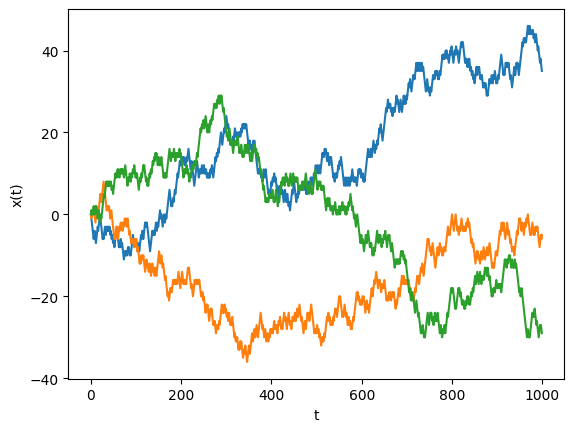

In [32]:
for walker in walkers:
    plt.plot(walker)
plt.xlabel('t')
plt.ylabel('x(t)');

**4.2** Do the same but now $\Delta$ is sampled from a gaussian with mean $0$ and standard deviation $1$. Compare qualitatively to the previous random walk: do the figures look the same ?

In [33]:
# Your solution here:

In [34]:
# Solution
def random_walk_gaussian(T=1000, pos_init=0):
    positions=np.zeros(T)
    for t in range(T-1):
        positions[t+1]=positions[t]+rng.normal()
    return positions

In [35]:
walkers=[]
for _ in range(3):
    walkers.append(random_walk_gaussian())

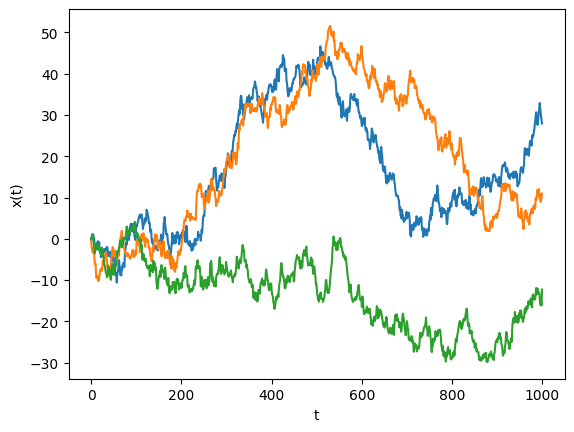

In [36]:
for walker in walkers:
    plt.plot(walker)
plt.xlabel('t')
plt.ylabel('x(t)');

**4.3** We now want to sample the distribution $\rho$ with $N$ particles. Code a function that returns an array of size $N\times T$ representing the position of the $N$ particles after each timestep. $N$ and $T$ should be inputs of the function. $\Delta$ should be sampled from a uniform distribution between $-1$ and $1$. Initialize the position of each particle at $x=0$.

In [37]:
# Your solution here:

In [38]:
def multiple_random_walks_uniform(N=10000, T=100):
    positions=np.zeros((N,T))
    for t in range(T-1):
        positions[:,t+1]=positions[:,t]+rng.uniform(-1,1,size=N)
    return positions

**4.4** Using your previously defined function, plot the distribution of the positions between $-10$ and $10$ for $N=10000$ particles using `plt.histogram` for $t=1,2,5,10$. Do a different figure for each value of $t$. Fix the y-axis so that you can compare the different figures. Additionnaly, plot the analytical solution of the diffusion equation 
$$
\rho(x,t)=\frac{1}{\sqrt{4 \pi D t}}\text{exp}(-\frac{x^2}{4Dt}), \,D=\frac{\text{Var}(\Delta)}{2\tau}
$$
on top of the histograms. Recall that in our case $\tau=1$.

Hint: The variance for the uniform distribution between $-1$ and $1$ is $1/3$.

In [39]:
# Your solution here:

In [40]:
# Solution
def rho(x,t, sigma):
    D = sigma**2/2
    return 1/np.sqrt(4*np.pi*D*t)*np.exp(-x**2/(4*D*t))

In [41]:
sigma=np.sqrt(1/3) # The standard deviation of the uniform distribution
positions=multiple_random_walks_uniform()

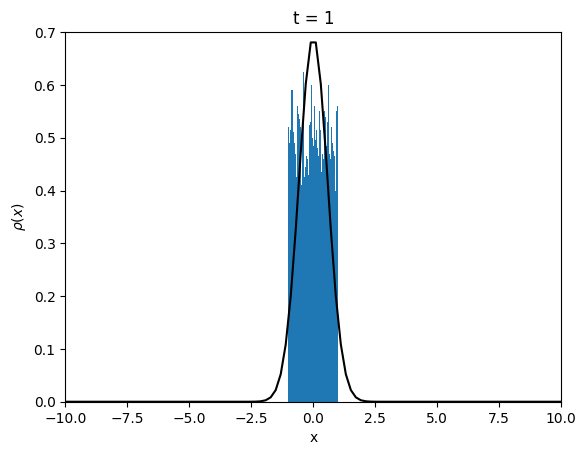

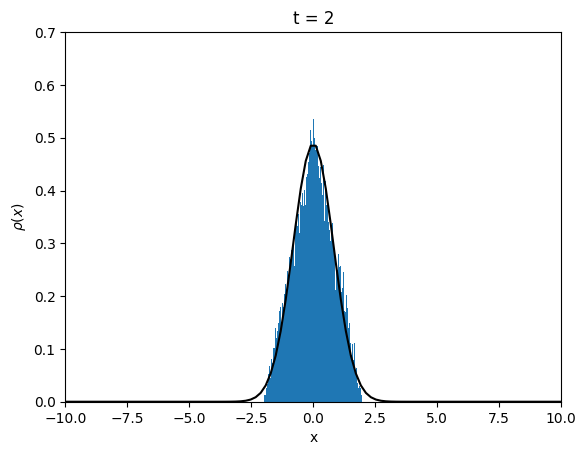

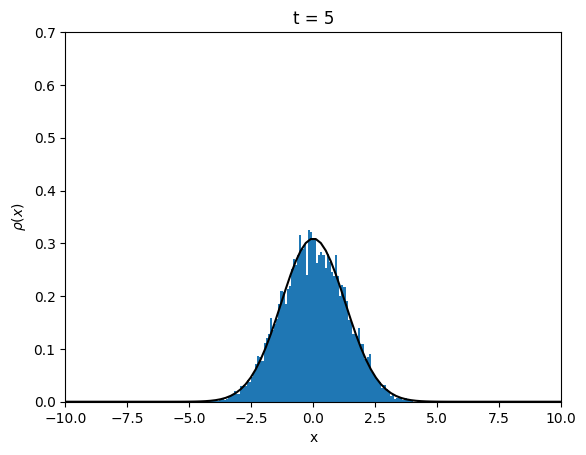

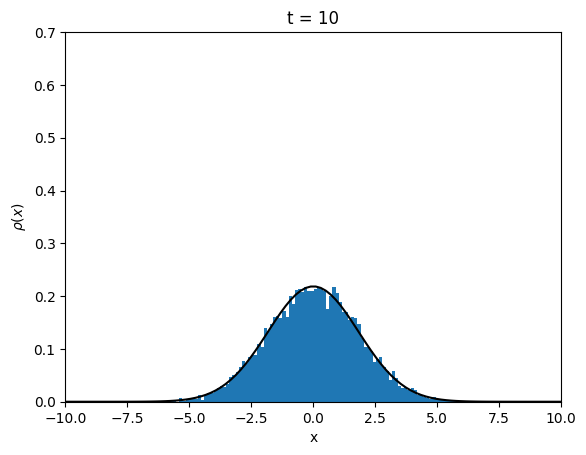

In [42]:
t=1
for t in [1,2,5,10]:
    plt.hist(positions[:,t], bins=100,density=True)
    plt.plot(np.linspace(-10,10,100), rho(np.linspace(-10,10,100),t,sigma), color='k')
    plt.xlim(-10,10)
    plt.ylim(0,0.7)
    plt.title('t = '+str(t))
    plt.xlabel('x')
    plt.ylabel(r'$\rho(x)$')
    plt.show()

**4.5** Plot the empirical standard deviation of the positions of the particles as a function of time for $T=100$ in a log-log scale. Also plot the standard deviation $\sqrt{2Dt}$ from the analytical solution, and check that they are the same.

In [43]:
# Your solution here:

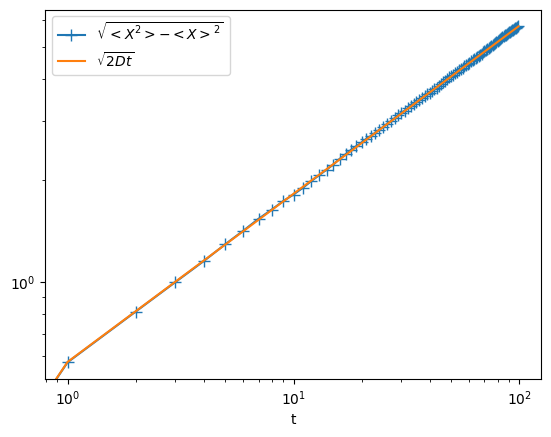

In [44]:
plt.loglog(np.arange(0, 100), np.std(positions, axis=0), label='$\sqrt{<X^2>-<X>^2}$', marker='+', markersize=8)
plt.loglog(np.arange(0, 100), np.sqrt(sigma**2*np.arange(0, 100)), label='$\sqrt{2Dt}$')
plt.xlabel('t')
plt.legend();

**4.6** Repeat 4.4 and 4.5 but this time with $\Delta=\pm 1$ with equal probability. Be careful when choosing the bins and weights. Since the walker moves $\pm 1$
, it stays on a lattice of integers whose parity depends on $t$. You may need to manually adjust weights or bin sizes so the histogram height matches the continuous Gaussian curve. Also plot the result for $t=99$ (adapt the xlim if needed).

In [45]:
# Your solution here:

In [46]:
def multiple_random_walks_binary(N=10000, T=100):
    positions=np.zeros((N,T))
    for t in range(T-1):
        positions[:,t+1]=positions[:,t]+rng.choice([-1,1], size=N)
    return positions

In [47]:
# Solution
sigma=1 # The standard deviation of the uniform distribution
positions=multiple_random_walks_binary()

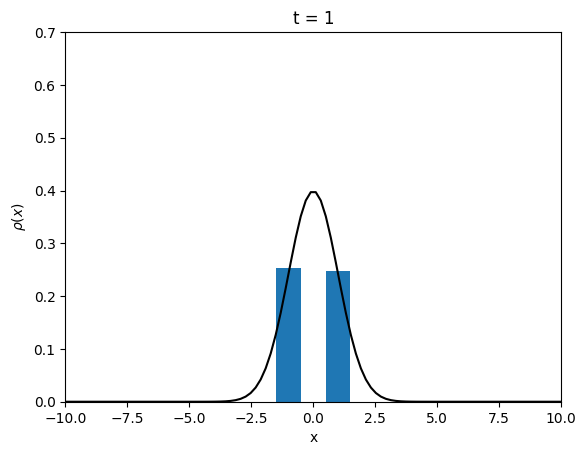

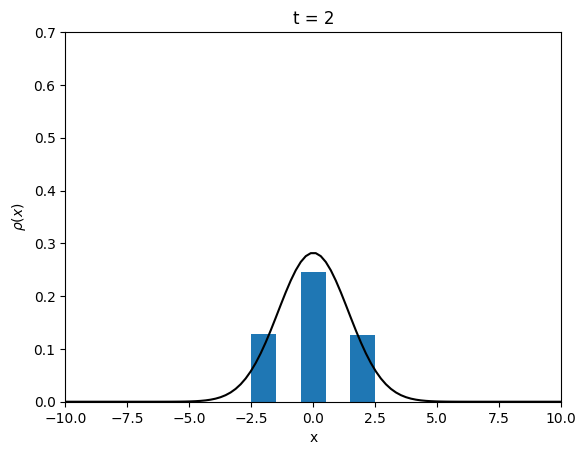

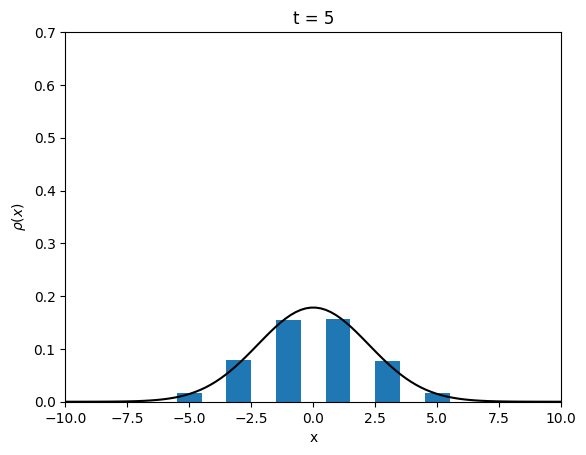

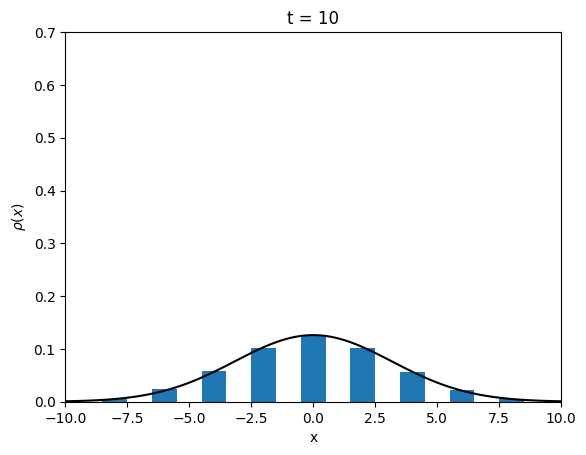

In [48]:
t=1
for t in [1,2,5,10]:
    '''
    Since the walk is on a discrete lattice with spacing 2 (parity constraint), the density is only non-zero on half the integers. 
    Standard density normalization distributes mass over the empty gaps. 
    We adjust weights or binning to visually align the discrete envelope with the continuous Gaussian approximation.
    '''
    plt.hist(positions[:,t], bins=np.arange(-10.5,10.5,1), weights=np.ones(10000)/20000, align='mid') 
    plt.plot(np.linspace(-10,10,100), rho(np.linspace(-10,10,100),t,sigma), color='k')
    plt.xlim(-10,10)
    plt.ylim(0,0.7)
    plt.title('t = '+str(t))
    plt.xlabel('x')
    plt.ylabel(r'$\rho(x)$')
    plt.show()

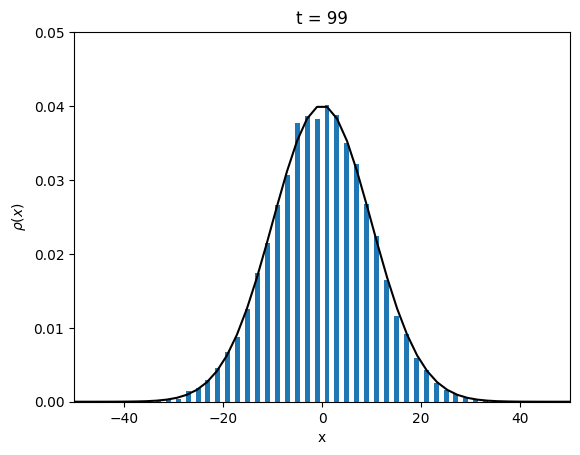

In [49]:
t=1
for t in [99]:
    plt.hist(positions[:,t], bins=np.arange(-100.5,100.5,1), weights=np.ones(10000)/20000, align='mid') 
    plt.plot(np.linspace(-100,100,100), rho(np.linspace(-100,100,100),t,sigma), color='k')
    plt.xlim(-50,50)
    plt.ylim(0,0.05)
    plt.title('t = '+str(t))
    plt.xlabel('x')
    plt.ylabel(r'$\rho(x)$')
    plt.show()

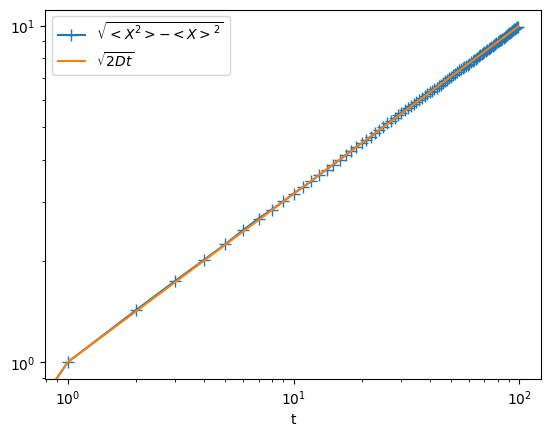

In [50]:
plt.loglog(np.arange(0, 100), np.std(positions, axis=0), label='$\sqrt{<X^2>-<X>^2}$', marker='+', markersize=8)
plt.loglog(np.arange(0, 100), np.sqrt(sigma**2*np.arange(0, 100)), label='$\sqrt{2Dt}$')
plt.xlabel('t')
plt.legend();